# Import

In [86]:
!pip install scikit-plot

In [87]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import scikitplot as skplt

# train test data split
from sklearn.model_selection import train_test_split

# import linear regression model
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# import standard scaler for standardization
from sklearn.preprocessing import MinMaxScaler

In [88]:
df = pd.read_csv('car_price.csv')

# Data Profiling and Preprocessing

## Data Profiling

In [89]:
# check all data
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [90]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [91]:
# check amount of car name
df.car_name.value_counts()

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64

In [92]:
# check amount of car prices in rupee
df.car_prices_in_rupee.value_counts()

4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
              ..
12.03 Lakh     1
15.62 Lakh     1
7.92 Lakh      1
29.25 Lakh     1
31.90 Lakh     1
Name: car_prices_in_rupee, Length: 1300, dtype: int64

In [93]:
# check amount of kms driven
df.kms_driven.value_counts()

80,000 kms      163
1,20,000 kms    146
60,000 kms      142
50,000 kms      136
70,000 kms      132
               ... 
79,385 kms        1
51,242 kms        1
38,733 kms        1
77,385 kms        1
85,002 kms        1
Name: kms_driven, Length: 2610, dtype: int64

In [94]:
# check amount of fuel type
df.fuel_type.value_counts()

Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [95]:
# check amount of transmission
df.transmission.value_counts()

Manual       3962
Automatic    1550
Name: transmission, dtype: int64

In [96]:
# check amount of ownership
df.ownership.value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [97]:
# check amount of manufacture
df.manufacture.value_counts()

2017    621
2015    530
2018    526
2019    493
2016    470
2014    461
2013    372
2020    347
2021    344
2012    301
2011    263
2010    217
2022    145
2009    132
2008    113
2007     60
2006     42
2005     28
2004     16
2002     13
2003      8
2000      4
1998      2
2001      2
1995      1
1999      1
Name: manufacture, dtype: int64

In [98]:
# check amount of engine
df.engine.value_counts()

1197 cc    714
1248 cc    395
998 cc     346
1498 cc    252
1497 cc    245
          ... 
1173 cc      1
2359 cc      1
5950 cc      1
3956 cc      1
2979 cc      1
Name: engine, Length: 139, dtype: int64

In [99]:
# check amount of seats
df.Seats.value_counts()

5 Seats    4673
7 Seats     631
4 Seats      88
6 Seats      61
8 Seats      54
2 Seats       5
Name: Seats, dtype: int64

## Data Cleaning

In [100]:
# check missing values
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [101]:
# check duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [102]:
# delete unnecessary columns
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [103]:
# delete 0th owner from ownership column
df = df[df['ownership'] != '0th Owner']

In [104]:
# split car prices column into price column and currency column
df[['price', 'currency']] = df['car_prices_in_rupee'].str.split(' ', 1, expand=True)
df.drop('car_prices_in_rupee', axis=1, inplace=True)

In [105]:
# change data type to float
df['price'] = df['price'].str.replace(',', '.').astype('float')

In [106]:
# delete km text from kms driven column and change data type to integer
df['kms_driven'] = df['kms_driven'].str.replace(' kms','')
df['kms_driven']=df['kms_driven'].str.replace(',','').astype(int)

In [107]:
# delete cc text from engine column and change data type to integer
df['engine'] = df['engine'].str.replace(' cc','').astype(int)

In [108]:
# delete seats text from seats column and change data type to integer
df['Seats'] = df['Seats'].str.replace(' Seats','').astype(int)

In [109]:
# check statistical data
df.describe()

,kms_driven,manufacture,engine,Seats,price
count,5505.000000,5505.000000,5505.000000,5505.000000,5505.000000
mean,63279.978928,2015.447593,1532.241235,5.251045,11.766243
std,41826.778607,3.924087,579.428251,0.720477,16.740519
min,250.000000,1995.000000,0.000000,2.000000,1.000000
25%,33500.000000,2013.000000,1197.000000,5.000000,3.250000
50%,59176.000000,2016.000000,1396.000000,5.000000,5.630000
75%,84280.000000,2018.000000,1950.000000,5.000000,10.800000
max,560000.000000,2022.000000,5950.000000,8.000000,99.999000


Note that from the table above, we can see that the minimum value for engine is 0 cc which is impossible as every car engine must have value larger than 0. The treatment for this is to remove the 0 value for engine column

In [110]:
# remove zero value for engine minimum cc
df = df[df['engine']>0]
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,currency
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,1st Owner,2017,1956,5,10.03,Lakh
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,1st Owner,2021,1330,5,12.83,Lakh
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,1st Owner,2016,2494,5,16.40,Lakh
3,Honda Jazz VX CVT,26696,Petrol,Automatic,1st Owner,2018,1199,5,7.77,Lakh
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,1st Owner,2016,1199,5,5.15,Lakh


In [111]:
df.describe()

,kms_driven,manufacture,engine,Seats,price
count,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000
mean,63305.104861,2015.443838,1535.588567,5.251229,11.769807
std,41854.541975,3.924820,575.612389,0.720790,16.750819
min,250.000000,1995.000000,624.000000,2.000000,1.000000
25%,33500.000000,2013.000000,1197.000000,5.000000,3.250000
50%,59215.000000,2016.000000,1396.000000,5.000000,5.630000
75%,84346.000000,2018.000000,1950.000000,5.000000,10.800000
max,560000.000000,2022.000000,5950.000000,8.000000,99.999000


In [112]:
# check amount of currency type
df['currency'].value_counts()

Lakh     5314
          123
Crore      56
Name: currency, dtype: int64

In this analysis, only the Lakh currency will be analyzed. The other 179 won't be analyzed to avoid generating conflicts with the training model

In [113]:
# remove other currency other than Lakh
df=df[df['currency']=='Lakh']

In [114]:
# check all data
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,currency
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,1st Owner,2017,1956,5,10.03,Lakh
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,1st Owner,2021,1330,5,12.83,Lakh
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,1st Owner,2016,2494,5,16.40,Lakh
3,Honda Jazz VX CVT,26696,Petrol,Automatic,1st Owner,2018,1199,5,7.77,Lakh
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,1st Owner,2016,1199,5,5.15,Lakh


In [115]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5314 non-null   object 
 1   kms_driven    5314 non-null   int32  
 2   fuel_type     5314 non-null   object 
 3   transmission  5314 non-null   object 
 4   ownership     5314 non-null   object 
 5   manufacture   5314 non-null   int64  
 6   engine        5314 non-null   int32  
 7   Seats         5314 non-null   int32  
 8   price         5314 non-null   float64
 9   currency      5314 non-null   object 
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 394.4+ KB


# Exploratory Data Analysis (EDA)

In [116]:
X = df.drop('price', axis=1)
y = df['price']

In [117]:
df = pd.concat([X,y],1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8808\1160752360.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([X,y],1)


Text(0.5, 1.0, 'Correlation Heatmap')

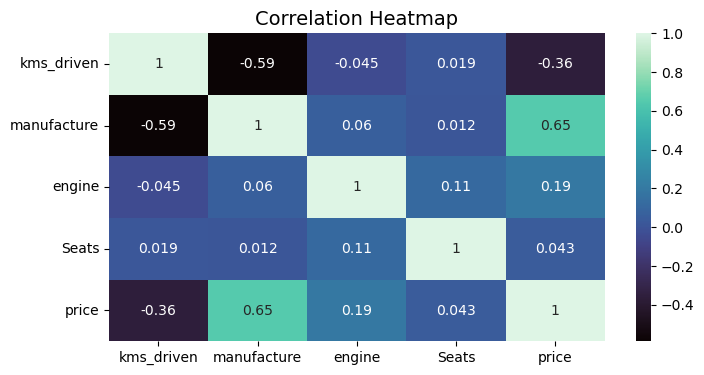

In [118]:
# correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='mako', annot=True)
plt.title('Correlation Heatmap', fontsize=14)

array([[<AxesSubplot:title={'center':'kms_driven'}>,
        <AxesSubplot:title={'center':'manufacture'}>],
       [<AxesSubplot:title={'center':'engine'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

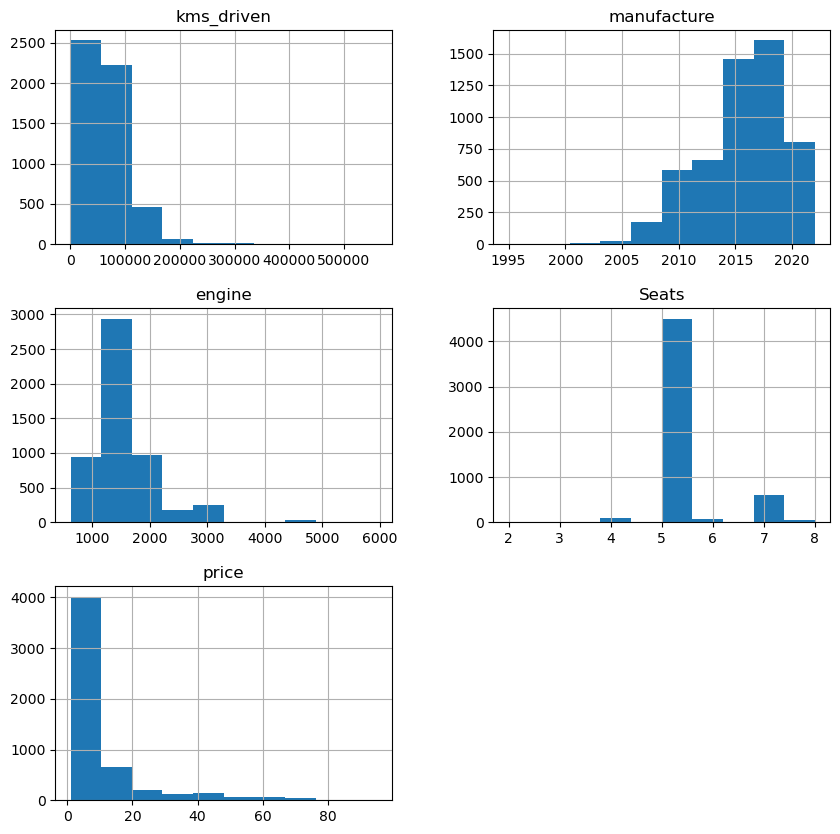

In [119]:
# distribution plot
df.hist(figsize=(10,10))

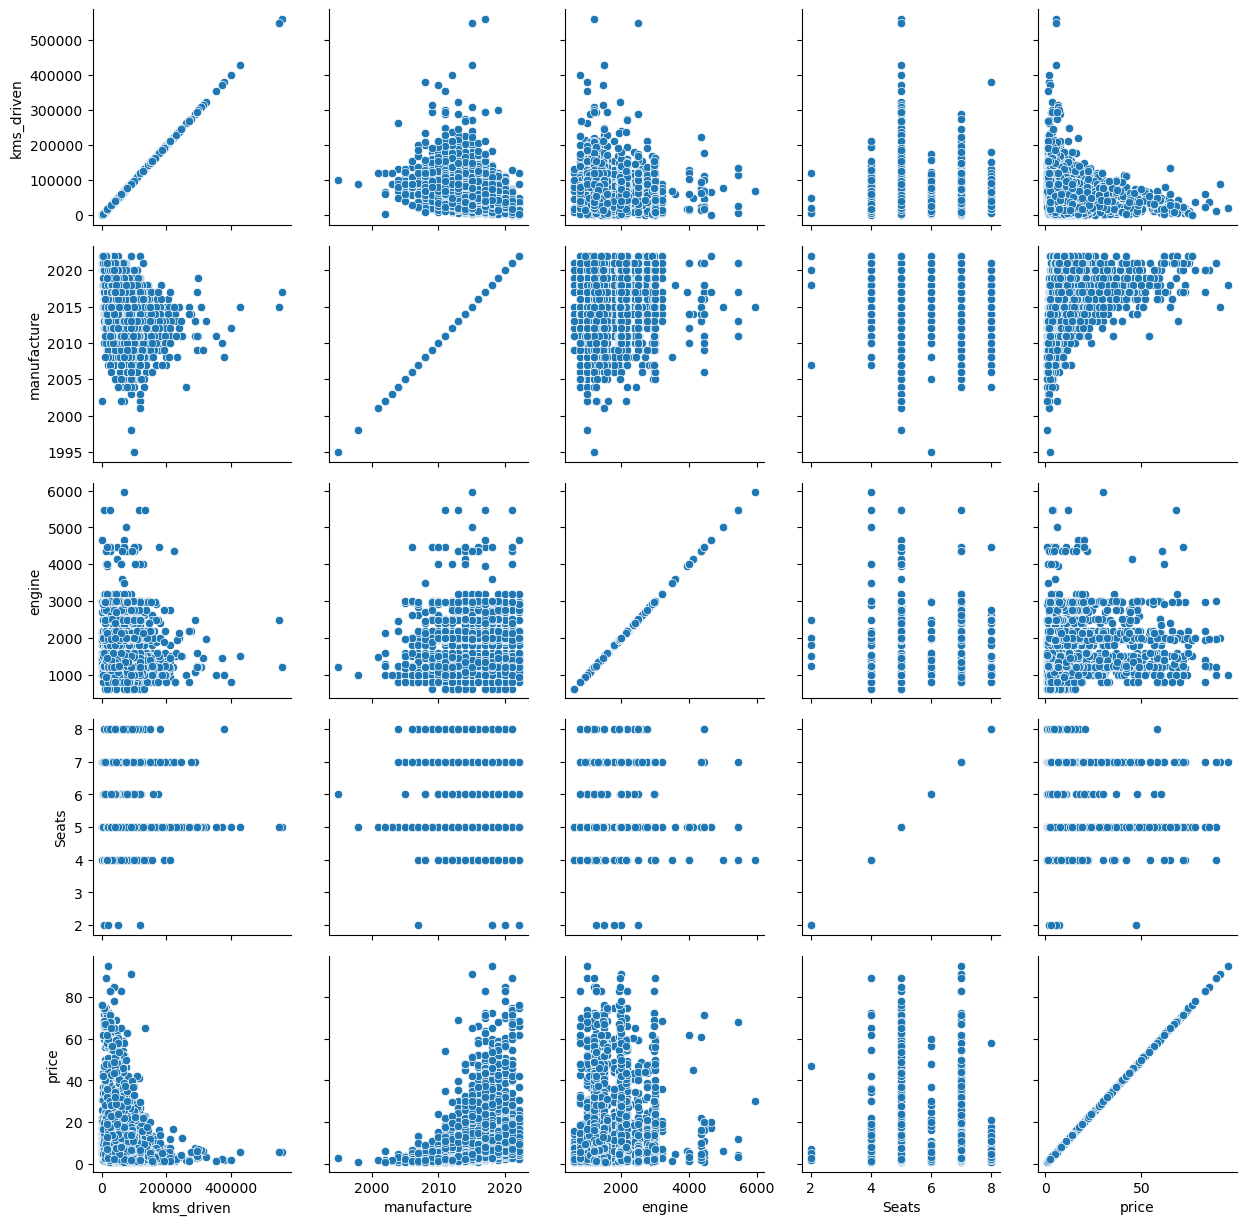

In [120]:
# Plot correlations
g = sns.PairGrid(df)
g.map(sns.scatterplot)

## Car Name

In [121]:
# Top 10 Cars by Sold Quantity
top_10_cars_sold = df['car_name'].value_counts()[:10]
top_10_cars_sold

Maruti Alto 800 LXI         53
Maruti Swift VXI            46
Maruti Swift Dzire VDI      42
Maruti Wagon R VXI BS IV    42
Maruti Swift Dzire VXI      42
Maruti Swift VDI BSIV       35
Maruti Wagon R LXI BS IV    29
Maruti Alto K10 VXI         28
Maruti Swift VDI            26
Maruti Wagon R LXI CNG      25
Name: car_name, dtype: int64

Text(0.5, 1.0, 'Top 10 Sold Cars')

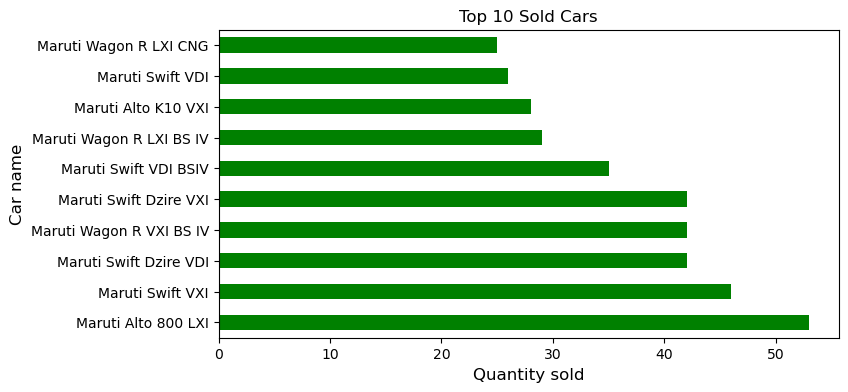

In [122]:
# Top 10 Cars by Sold Quantity
plt.figure(figsize=(8,4))
top_10_cars_sold.plot.barh(color = 'green')
plt.xlabel('Quantity sold', fontsize = 12)
plt.ylabel('Car name', fontsize = 12)
plt.title('Top 10 Sold Cars')

In [123]:
# Top 10 Cars by Price
top_10_expensive_cars = df.groupby(['car_name']).agg({'price':'mean'})
top_10_expensive_cars = top_10_expensive_cars.sort_values('price', ascending = False)[:10]
top_10_expensive_cars

,price
car_name,
Toyota Land Cruiser VX,95.0
Toyota Land Cruiser VX Premium,91.0
Mercedes-Benz GLE 300d,89.0
Land Rover Range Rover Velar R-Dynamic S Petrol MY21,85.0
BMW X5 xDrive 30d xLine,83.0
BMW X4 xDrive30i M Sport Silver Shadow Edition,74.5
Jaguar F-Pace 2.0 R-Dynamic S Diesel,74.0
BMW 7 Series 730Ld M Sport,72.5
Land Rover Discovery Sport R-Dynamic SE,72.0


Text(0.5, 1.0, 'Top 10 Expensive Old Cars')

<Figure size 800x400 with 0 Axes>

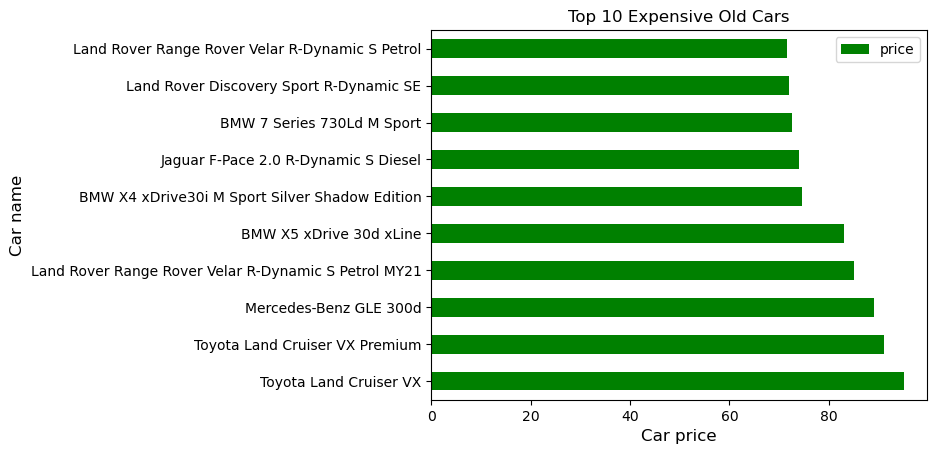

In [124]:
# Top 10 Cars by Price
plt.figure(figsize=(8,4))
top_10_expensive_cars.plot.barh(color = 'green')
plt.xlabel('Car price', fontsize = 12)
plt.ylabel('Car name', fontsize = 12)
plt.title('Top 10 Expensive Old Cars')

## KMs Driven

In [125]:
# Top 10 KMs Driven Cars
top_10_kms_driven_cars = df.groupby(['car_name']).agg({'kms_driven':'mean'})
top_10_kms_driven_cars = top_10_kms_driven_cars.sort_values('kms_driven', ascending = False)[:10]
top_10_kms_driven_cars

,kms_driven
car_name,
Maruti Ciaz AT ZXi,430000.0
Tata Sumo CX,400000.0
Chevrolet Tavera B2 8 Seats BSIII,380000.0
Hyundai Verna CRDi SX,372588.0
Tata Indigo LS BSIV,355444.0
Mahindra Scorpio VLX 2WD 7S BSIV,300000.0
Mahindra Scorpio SLE 7S BSIII,295392.0
Maruti Swift Dzire ZXi,295000.0
Honda City 1.5 EXI,263000.0


Text(0.5, 1.0, 'Top 10 KMs Driven Cars')

<Figure size 800x400 with 0 Axes>

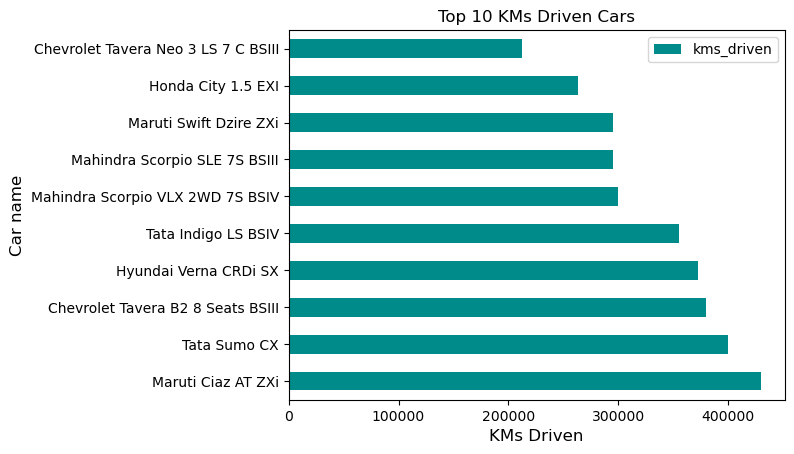

In [126]:
# Top 10 KMs Driven Cars
plt.figure(figsize=(8,4))
top_10_kms_driven_cars.plot.barh(color = 'darkcyan')
plt.xlabel('KMs Driven', fontsize = 12)
plt.ylabel('Car name', fontsize = 12)
plt.title('Top 10 KMs Driven Cars')

## Fuel Type

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

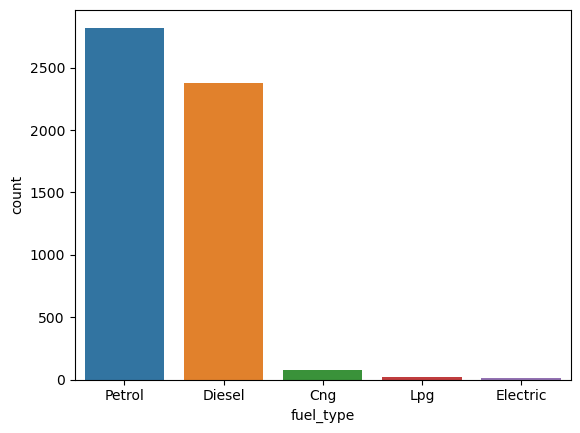

In [127]:
# check variable of fuel type
sns.countplot(data = df, x = 'fuel_type', order = df['fuel_type'].value_counts().index)

It can be seen from the graph above that the used car sold are mostly petrol and diesel

In [128]:
# fuel type car price
fuel_type_price = df.groupby('fuel_type').agg({'price':'mean'}).sort_values('price', ascending=False)
fuel_type_price

,price
fuel_type,
Electric,15.095000
Diesel,13.807683
Petrol,7.750659
Cng,4.000875
Lpg,1.789545


<AxesSubplot:xlabel='fuel_type'>

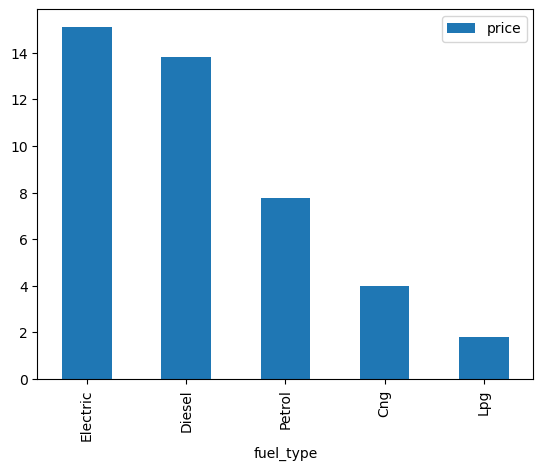

In [129]:
# bar plot of fuel type car price
fuel_type_price.plot.bar()

The used car fuel type with the highest price is electric, diesel, petrol, CNG and LPG respectively

## Transmission

<AxesSubplot:xlabel='transmission', ylabel='count'>

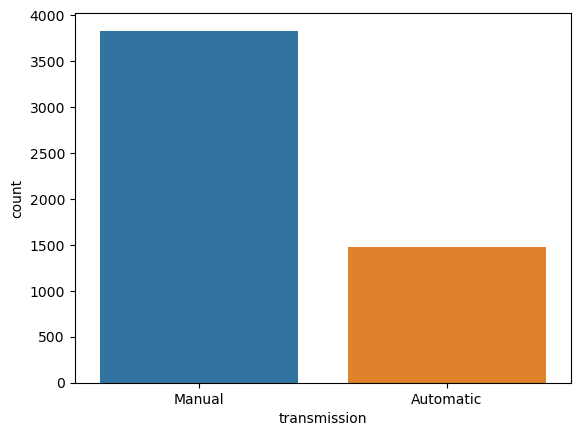

In [130]:
# check variable of transmission
sns.countplot(data = df, x = 'transmission')

There are more manual transmission used cars sold than the automatic ones

In [131]:
# transmission type car price
transmission_type_price = df.groupby('transmission').agg({'price':'mean'})
transmission_type_price

,price
transmission,
Automatic,23.867623
Manual,5.191667


<AxesSubplot:xlabel='transmission'>

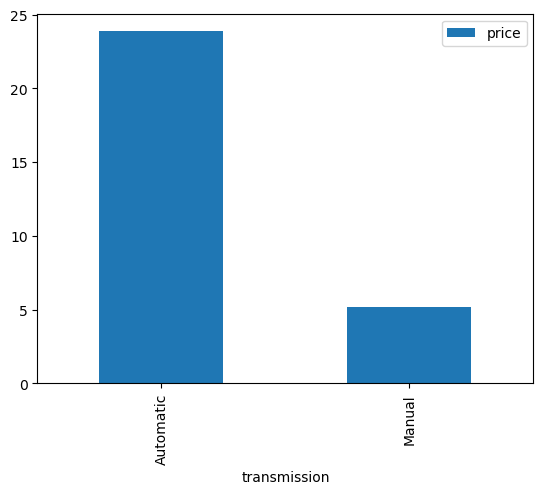

In [132]:
# bar plot of transmission type car price
transmission_type_price.plot.bar()

Automatic transmission used cars tend to have higher price than the manual transmission and the difference is pretty significant

## Ownership

<AxesSubplot:xlabel='ownership', ylabel='count'>

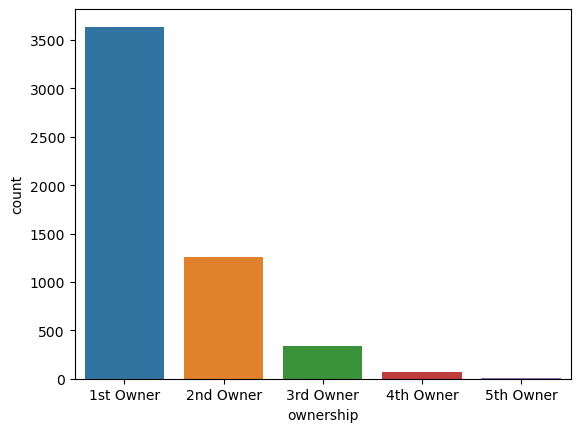

In [133]:
# check variable of car ownership
sns.countplot(data = df, x = 'ownership')

In [134]:
# average car price by number of owners
ownership_price = df.groupby(['ownership']).agg({'price':'mean'})
ownership_price

,price
ownership,
1st Owner,11.902246
2nd Owner,8.113209
3rd Owner,4.421268
4th Owner,3.210286
5th Owner,2.342222


<AxesSubplot:title={'center':'Average Car Price by Number of Owners'}, xlabel='ownership'>

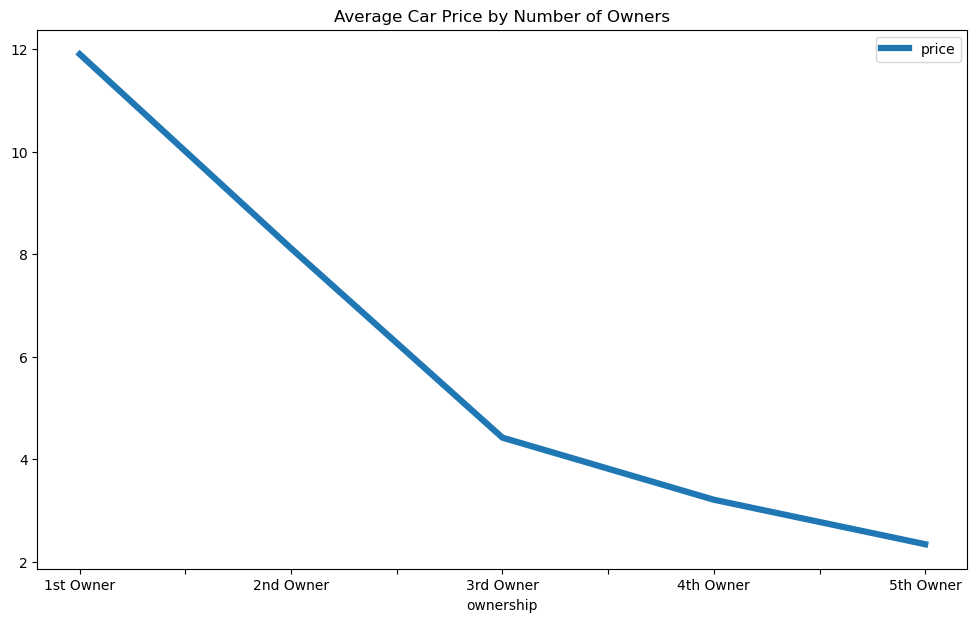

In [135]:
# line plot of average car price by number of owners
ownership_price = df.groupby('ownership').agg({'price':'mean'})
ownership_price.plot(kind='line', linewidth=4.5, figsize=(12,7), title='Average Car Price by Number of Owners')

Used car sold price tends to go down if it has been owned by more owners.

## Manufacture

<AxesSubplot:title={'center':'Average Car Price by Manufacturing Year'}, xlabel='manufacture'>

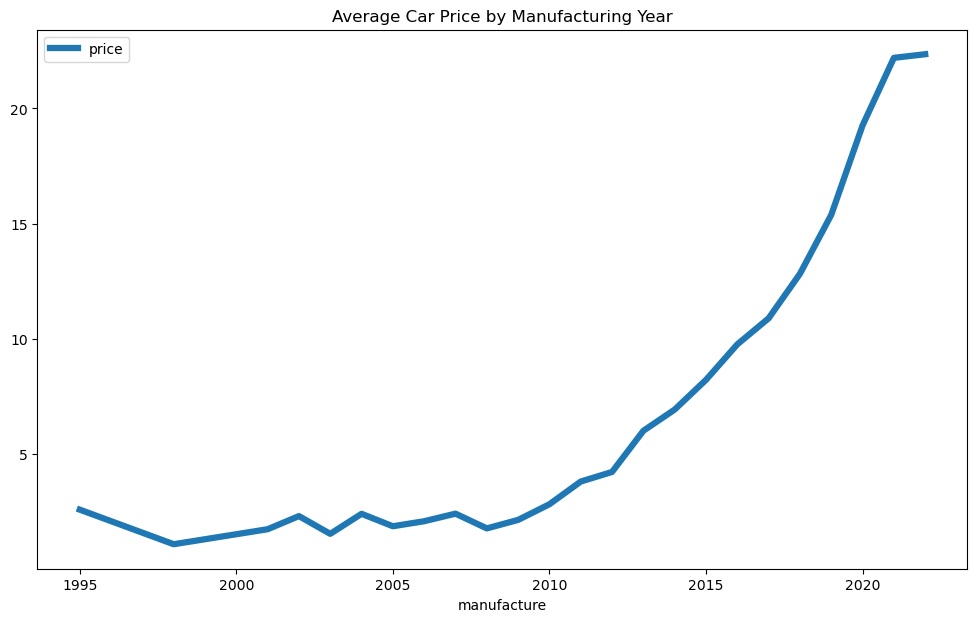

In [136]:
# line plot of average car price by manufacturing year
manufacture_year_price = df.groupby('manufacture').agg({'price':'mean'})
manufacture_year_price.plot(kind='line', linewidth=4.5, figsize=(12,7), title='Average Car Price by Manufacturing Year')

We can see from the graph above that used cars tend to have higher sold price if the old car manufacturing year is more recent.

## Engine

Engine cc is categorized to ease the analysis. The engine is classified into low, medium and high cc with details as below
- Low: 624 - 1500
- Medium: 1500 - 2500
- High: >2500

In [137]:
# categorize engine cc
df['engine_cat'] = pd.cut(df['engine'],
                              bins=[624., 1500., 2500, np.inf],
                              labels=['low', 'medium', 'high'])

In [138]:
# average car price by engine category
engine_category_price = df.groupby('engine_cat').agg({'price':'mean'}).sort_values('price', ascending=False)
engine_category_price

,price
engine_cat,
high,15.332371
medium,13.913269
low,8.595748


<AxesSubplot:xlabel='engine_cat'>

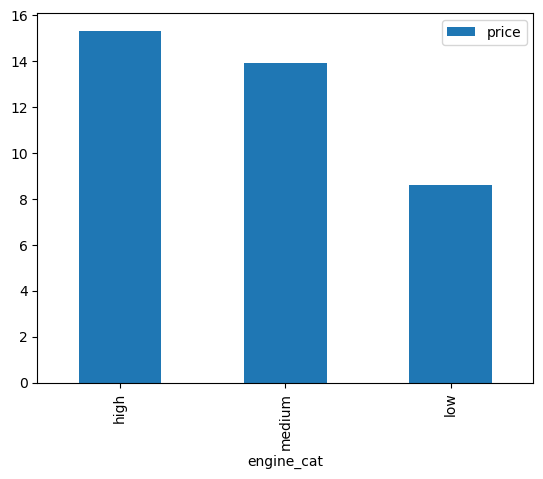

In [139]:
# bar plot of average car price by engine category
engine_category_price.plot.bar()

The higher the cc of the old car's engine, the higher the sold price is

## Seats

In [140]:
# average car price by number of seats
seats_year_price = df.groupby('Seats').agg({'price':'mean'})
seats_year_price

,price
Seats,
2,12.790000
4,13.987229
5,10.199560
6,10.636721
7,11.571033
8,7.386863


<AxesSubplot:title={'center':'Average Car Price by Number of Seats'}, xlabel='Seats'>

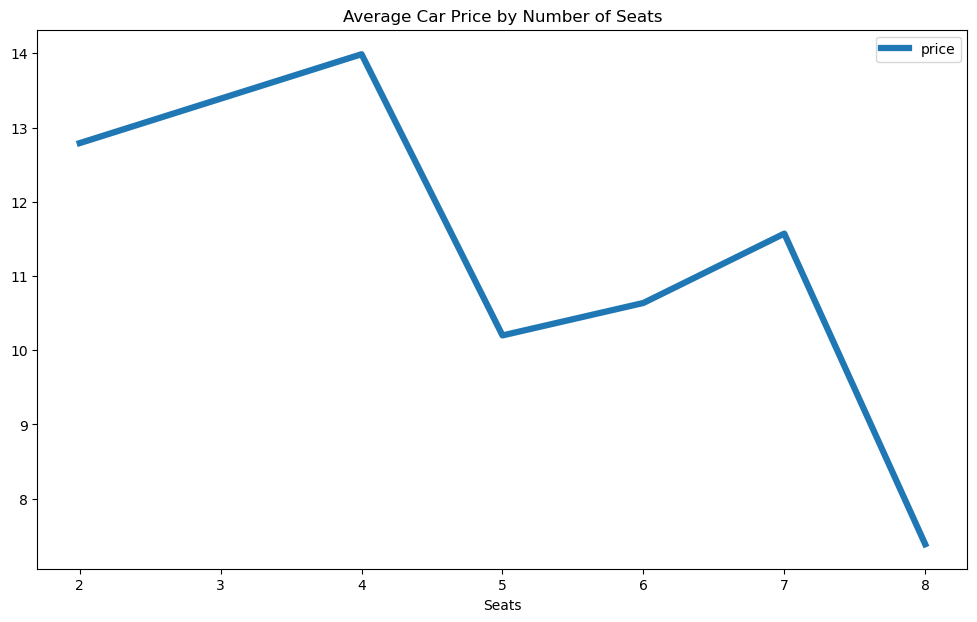

In [141]:
# line plot of average car price by number of seats
seats_year_price.plot(kind='line', linewidth=4.5, figsize=(12,7), title='Average Car Price by Number of Seats')

Old cars with 4 seater has the highest average sold price than the others. Meanwhile, old cars with 8 seater has the lowest average sold price than the others.

# Modelling Preparation

## Data Splitting

In [142]:
# drop unnecessary columns
df.drop(['car_name', 'currency', 'engine_cat'], axis=1, inplace=True)

In [143]:
# split data
X = df.drop('price', axis=1)
y = df['price']

In [144]:
df = pd.concat([X,y],1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8808\1160752360.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([X,y],1)


In [145]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1000)

In [146]:
# check all data
df.head(3)

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price
0,86226,Diesel,Manual,1st Owner,2017,1956,5,10.03
1,13248,Petrol,Automatic,1st Owner,2021,1330,5,12.83
2,60343,Petrol,Automatic,1st Owner,2016,2494,5,16.40


# Modelling

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
# apply Label Encoder
features = ['fuel_type', 'transmission', 'ownership']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [149]:
# check all data
df.head(3)

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price
0,86226,1,1,0,2017,1956,5,10.03
1,13248,4,0,0,2021,1330,5,12.83
2,60343,4,0,0,2016,2494,5,16.40


In [150]:
# split data
X = df.drop('price', axis=1)
y = df['price']

In [151]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1000)

## Linear Model Regression

In [152]:
# define Linear Model Regression
linreg_model = LinearRegression()

# fit data into the model
linreg_model.fit(X_train, y_train)

LinearRegression()

In [153]:
# generate prediction result
linreg_result = linreg_model.predict(X_test)

## XGB Model Regression

In [154]:
# define XGB Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [155]:
# generate prediction result
xgb_result = xgb_model.predict(X_test)

# Model Evaluation

## Linear Model Regression

In [156]:
# R squared
linreg_model.score(X_test, y_test)

0.49143763852957256

In [157]:
# mean absolute error
metrics.mean_absolute_error(y_test, linreg_result)

6.177485335153348

In [158]:
# mean squared error
np.sqrt(metrics.mean_squared_error(y_test, linreg_result))

10.18596684669405

## XGB Model Regression

In [159]:
# R squared
xgb_model.score(X_test, y_test)

0.6801644356104697

In [160]:
# mean absolute error
metrics.mean_absolute_error(y_test, xgb_result)

4.428928098693448

In [161]:
# mean squared error
np.sqrt(metrics.mean_squared_error(y_test, xgb_result))

8.077808026290734

# Model Interpretation

## Linear Model Regression

In [162]:
linreg_feature_weight = pd.DataFrame(
    {
        'var_name': X_train.columns.tolist(),
        'coef': linreg_model.coef_.tolist()
    }
)

linreg_feature_weight

,var_name,coef
0,kms_driven,-0.000032
1,fuel_type,-1.590788
2,transmission,-15.417627
3,ownership,-0.730375
4,manufacture,0.766940
5,engine,0.001575
6,Seats,-0.071613


<AxesSubplot:xlabel='coef', ylabel='var_name'>

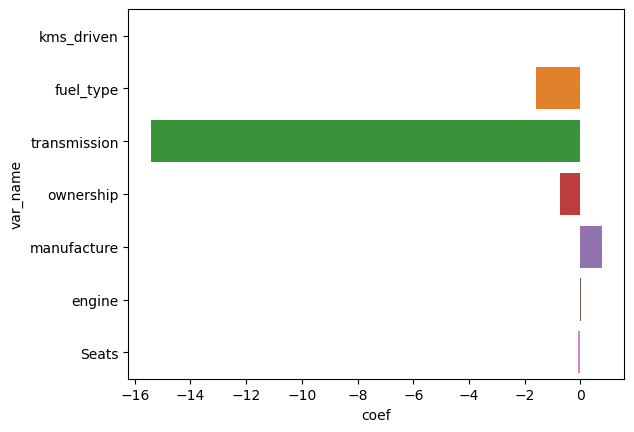

In [163]:
sns.barplot(data=linreg_feature_weight, y='var_name', x='coef')

## XGB Model Regression

In [164]:
xgb_feature_weight = pd.DataFrame(
    {
        'var_name': X_train.columns.tolist(),
        'coef': xgb_model.feature_importances_.tolist()
    }
)

xgb_feature_weight

,var_name,coef
0,kms_driven,0.052634
1,fuel_type,0.161096
2,transmission,0.567725
3,ownership,0.031130
4,manufacture,0.119803
5,engine,0.040492
6,Seats,0.027119


<AxesSubplot:xlabel='coef', ylabel='var_name'>

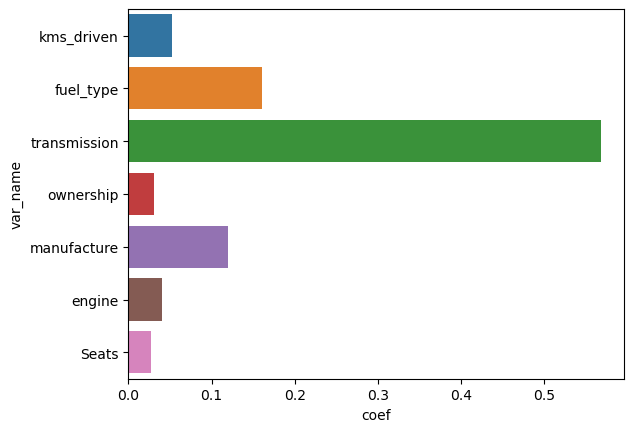

In [165]:
sns.barplot(data=xgb_feature_weight, y='var_name', x='coef')

In [166]:
X_train_new = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns = X_train.columns)

In [167]:
X_train_new.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0.029321,1.00,0.0,0.0,0.962963,0.285205,0.333333
1,0.077586,0.25,1.0,0.0,0.777778,0.164101,0.500000
2,0.088312,1.00,1.0,0.0,0.666667,0.117161,0.500000
3,0.056955,1.00,0.0,0.0,0.851852,0.070222,0.500000
4,0.036993,1.00,1.0,0.0,0.814815,0.144949,0.500000


In [168]:
X_test_new = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns = X_test.columns)

In [169]:
X_test_new.head()

,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0.138566,1.00,1.0,0.000000,0.875000,0.339440,0.500000
1,0.170000,1.00,0.0,0.000000,0.791667,0.043328,0.500000
2,0.310355,0.25,1.0,0.333333,0.625000,0.142362,0.833333
3,0.572900,0.25,1.0,0.000000,0.666667,0.216143,0.500000
4,0.273851,0.25,1.0,0.000000,0.833333,0.141867,0.833333


In [170]:
# define Linear Model Regression
linreg_model = LinearRegression()

# fit data into the model
linreg_model.fit(X_train_new, y_train)

# generate prediction result
linreg_result = linreg_model.predict(X_test_new)

In [171]:
linreg_feature_weight = pd.DataFrame(
    {
        'var_name': X_train.columns.tolist(),
        'coef': linreg_model.coef_.tolist()
    }
)

linreg_feature_weight

,var_name,coef
0,kms_driven,-18.073215
1,fuel_type,-6.363150
2,transmission,-15.417627
3,ownership,-2.921502
4,manufacture,20.707380
5,engine,8.389449
6,Seats,-0.429680


<AxesSubplot:xlabel='coef', ylabel='var_name'>

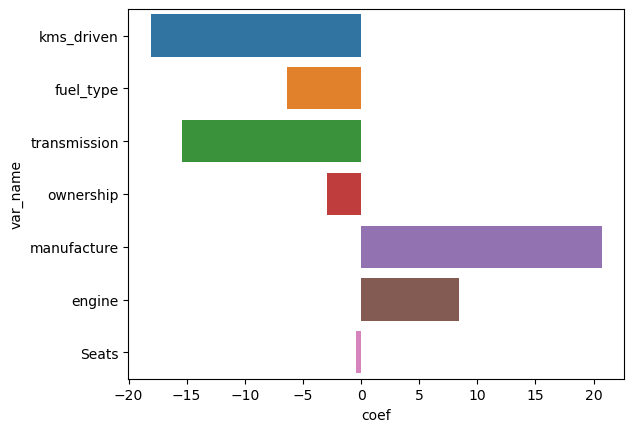

In [172]:
sns.barplot(data=linreg_feature_weight, y='var_name', x='coef')

In [173]:
# define XGB Model Regression
xgb_model = xgb.XGBRegressor()

# fit data into the model
xgb_model.fit(X_train_new, y_train)

# generate prediction result
xgb_result = xgb_model.predict(X_test_new)

In [174]:
xgb_feature_weight = pd.DataFrame(
    {
        'var_name': X_train.columns.tolist(),
        'coef': xgb_model.feature_importances_.tolist()
    }
)

xgb_feature_weight

,var_name,coef
0,kms_driven,0.052634
1,fuel_type,0.161096
2,transmission,0.567725
3,ownership,0.031130
4,manufacture,0.119803
5,engine,0.040492
6,Seats,0.027119


<AxesSubplot:xlabel='coef', ylabel='var_name'>

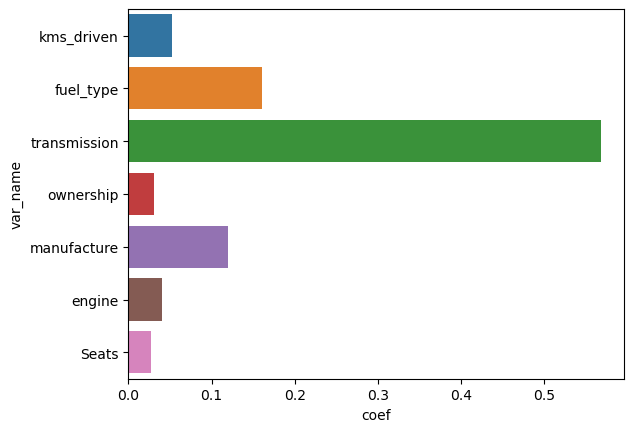

In [175]:
sns.barplot(data=xgb_feature_weight, y='var_name', x='coef')

# Conclusion and Recommendation

- The model used to predict old car price is XGB Regression with 65.7% R-squared score. Other model such as polynomial regression or multilinear regression can be used to further improve the regression score for better results.
- The variables that affect the old car price the most are transmission, fuel type, manufacture year, kms driven, engine cc, ownership and number of seats respectively. The top 3 categories are transmission, fuel type, manufacture year. The old car seller company can focus more on deciding the old car price based on these 3 categories.